In [ ]:
!pip install contexto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import json
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from contexto.correccion import Corrector, corregir_texto
from contexto.limpieza import *
from nltk.corpus import stopwords
from langdetect import detect

nltk.download('all')
stop = stopwords.words('spanish')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [481]:
ruta_tweets = "tweets_depresivos_3.json"

with open(ruta_tweets, "r") as fp:
    diccionario_tweets = json.load(fp)

    nombre_archivo_clasificacion = "clasificacion_depresivo.txt"

    llaves = list(diccionario_tweets['data'].keys())
    tweets = []

    for i in llaves:
        tweets.append(diccionario_tweets['data'][i]['text'])

In [482]:
#tweets = tweets[0:1000]

In [483]:
with open(nombre_archivo_clasificacion, 'r+') as archivo:
    clasificacion = archivo.readlines()

    cont = int(clasificacion.pop())

In [484]:
cont

22064

In [485]:
tweets = tweets[20000:cont]

In [486]:
len(clasificacion)

2064

In [487]:
clasificacion = [1 if i == 's\n' else 0 for i in clasificacion]

In [488]:
sum(clasificacion)

368

In [489]:
len(tweets)

2064

In [490]:
df1 = pd.DataFrame({"Comentarios": tweets})
df1.head(10)

,Comentarios
0,@rafadoacre Eu já tava aqui ansioso por uma fo...
1,mi mama me acaba de decir que si estan muy car...
2,"Odeio ser ansiosa, misericórdia!"
3,AAAAH eu tô mt ansiosa
4,Acordei ansiosa que vou tatuar meu bracinho am...
5,Sou tão ansiosa que já montei todos meus look ...
6,mds🥺🥺 ansiosa https://t.co/GZuaVGY7Ku
7,Estoy ansioso nea 💔🔥
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...
9,Que onda que todo Twitter esta teniendo depres...


In [491]:
df1['Depresivo'] = clasificacion
df1.head()

,Comentarios,Depresivo
0,@rafadoacre Eu já tava aqui ansioso por uma fo...,0
1,mi mama me acaba de decir que si estan muy car...,0
2,"Odeio ser ansiosa, misericórdia!",1
3,AAAAH eu tô mt ansiosa,0
4,Acordei ansiosa que vou tatuar meu bracinho am...,0


In [492]:
df1 = df1[df1['Depresivo'] == 1]
df1.head()

,Comentarios,Depresivo
2,"Odeio ser ansiosa, misericórdia!",1
7,Estoy ansioso nea 💔🔥,1
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1
14,Necesito un estómago nuevo o aprender a ser me...,1
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1


In [493]:
ruta_tweets2 = "tweets_no_depresivos_3.json"

with open(ruta_tweets2, "r") as fp:
    diccionario_tweets2 = json.load(fp)

    #nombre_archivo_clasificacion = "clasificacion.txt"

    #keys = list(diccionario_tweets['data'].keys())
    #llaves = map(lambda x: str(int(x) + len(keys)), keys)
    tweets2 = []
    
    llaves2 = list(diccionario_tweets2['data'].keys())
    for i in llaves2:
        tweets2.append(diccionario_tweets2['data'][i]['text'])

In [494]:
cont = len(df1)
cont

368

In [495]:
#tweets2 = tweets2[cont:cont + (cont-20000)*1]
tweets2 = tweets2[0:cont+300]

In [496]:
#(cont-20000)*1

In [497]:
df2 = pd.DataFrame({"Comentarios": tweets2})
df2.head(10)

,Comentarios
0,Jean Tobias #上海Dinah Harriman #上海线下 https://...
1,@dominguezbrii la expusiste😭😭😭
2,Una chama tan bella de chivacoa dijo “como est...
3,Piensa positiva no importa cuán dura sea la vi...
4,🧨PSOE y Unidas Podemos presentan mañana en el ...
5,@yamasuchi valla
6,¡Viva Morona Santiago en sus 69 años de provin...
7,"@SiqueRodriguez Pues haz tu trabajo, como lo h..."
8,haré una tanda de harry potter mientras hago m...
9,SE ACABARON LOS BOLETOS!!!!! VAMOOOS MI @Ameri...


In [498]:
df2['Depresivo'] = 0
df2.head()

,Comentarios,Depresivo
0,Jean Tobias #上海Dinah Harriman #上海线下 https://...,0
1,@dominguezbrii la expusiste😭😭😭,0
2,Una chama tan bella de chivacoa dijo “como est...,0
3,Piensa positiva no importa cuán dura sea la vi...,0
4,🧨PSOE y Unidas Podemos presentan mañana en el ...,0


In [499]:
df2.describe()

,Depresivo
count,668.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [500]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Comentarios  668 non-null    object
 1   Depresivo    668 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [501]:
df = pd.concat([df1, df2])
df

,Comentarios,Depresivo
2,"Odeio ser ansiosa, misericórdia!",1
7,Estoy ansioso nea 💔🔥,1
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1
14,Necesito un estómago nuevo o aprender a ser me...,1
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1
...,...,...
663,"@birdmancr No no para nada, asi se negocea ent...",0
664,"Me acuerdo como ahora,y no vi a lo defensores ...",0
665,@poisonganger Necesito fanfics ahora para calm...,0
666,@mikel_bonn @MotormikeFrank @Alice_Weidel Soso!,0


In [502]:
df.describe()

,Depresivo
count,1036.000000
mean,0.355212
std,0.478809
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


- Primero arrobas
- Luego links
- Luego quitar comentarios que no están en español
- Después acentos
- Luego limpieza básica

- Palabras cortas
- Corrección de palabras


### **Arrobas**

In [503]:
URL_PATTERN = r'\S*@\S+'
df['TweetPre'] = df.Comentarios.str.replace(URL_PATTERN, '', regex = True)
df = df[df['TweetPre'].notnull()]
df = df[df['TweetPre'] != '']
df.head()

,Comentarios,Depresivo,TweetPre
2,"Odeio ser ansiosa, misericórdia!",1,"Odeio ser ansiosa, misericórdia!"
7,Estoy ansioso nea 💔🔥,1,Estoy ansioso nea 💔🔥
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,Tw: s4ngr3 \nUna de las cosas que odio cuando ...
14,Necesito un estómago nuevo o aprender a ser me...,1,Necesito un estómago nuevo o aprender a ser me...
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,Ninguno oficial (no vaya a ser que tengamos u...


### **Links**

In [504]:
URL_PATTERN = r'[A-Za-z0-9:]+://[A-Za-z0-9%-_]+(/[A-Za-z0-9%-_])*(#|\\?)[A-Za-z0-9%-_&=]*'
df['TweetPre'] = df['TweetPre'].str.replace(URL_PATTERN, '', regex = True)
df = df[df['TweetPre'].notnull()]
df = df[df['TweetPre'] != '']
df.head()

,Comentarios,Depresivo,TweetPre
2,"Odeio ser ansiosa, misericórdia!",1,"Odeio ser ansiosa, misericórdia!"
7,Estoy ansioso nea 💔🔥,1,Estoy ansioso nea 💔🔥
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,Tw: s4ngr3 \nUna de las cosas que odio cuando ...
14,Necesito un estómago nuevo o aprender a ser me...,1,Necesito un estómago nuevo o aprender a ser me...
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,Ninguno oficial (no vaya a ser que tengamos u...


### **Eliminar Tweets de otros idiomas**

In [505]:
df['Idioma'] = 0
for i in range(0,len(df)):
    temp = df.Comentarios.iloc[i]
    try:
        df['Idioma'].iloc[i] = detect(temp)
    except:
        df['Idioma'].iloc[i] = "error"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [506]:
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
2,"Odeio ser ansiosa, misericórdia!",1,"Odeio ser ansiosa, misericórdia!",pt
7,Estoy ansioso nea 💔🔥,1,Estoy ansioso nea 💔🔥,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,Necesito un estómago nuevo o aprender a ser me...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,Ninguno oficial (no vaya a ser que tengamos u...,es


In [507]:
df = df[df['Idioma'] == 'es']
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,Estoy ansioso nea 💔🔥,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,Necesito un estómago nuevo o aprender a ser me...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,Ninguno oficial (no vaya a ser que tengamos u...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,"Si algún día me gana la depresión y me voy, qu...",es


### **Acentos y mayusculas**

In [508]:
trans = str.maketrans('áéíóúü', 'aeiouu')
df['TweetPre'] = df['TweetPre'].apply(lambda x: x.translate(trans))
df['TweetPre'] = df['TweetPre'].apply(lambda x: x.lower())
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,estoy ansioso nea 💔🔥,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,tw: s4ngr3 \nuna de las cosas que odio cuando ...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito un estomago nuevo o aprender a ser me...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial (no vaya a ser que tengamos u...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,"si algun dia me gana la depresion y me voy, qu...",es


Voy a poner todas las "risas" **Jajajajj** o **Jajajjjaaaj** en el mismo formato

In [509]:
regex = r'\b[JajJA]+\b'
#df['TweetPre'] = df['TweetPre'].str.replace(regex, 'jajaja', regex = True)
df['TweetPre'] = df['TweetPre'].str.replace(regex, '', regex = True)
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,estoy ansioso nea 💔🔥,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,tw: s4ngr3 \nuna de las cosas que odio cuando ...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito un estomago nuevo o aprender ser men...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial (no vaya ser que tengamos un...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,"si algun dia me gana la depresion y me voy, qu...",es


### **Limpieza basica**

In [510]:
# Limpieza básica, se pasa todo a minúsculas, se eliminan signos de puntuación y caracteres numéricos
df['TweetPre'] = df['TweetPre'].apply(lambda x: limpieza_basica(x))
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,estoy ansioso nea,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,tw s ngr una de las cosas que odio cuando me v...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito un estomago nuevo o aprender ser meno...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial no vaya ser que tengamos una s...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia me gana la depresion y me voy qui...,es


In [511]:
# Para quitar acentos (diéresis, tildes y virgulillas)
df['TweetPre'] = df['TweetPre'].apply(lambda x: remover_acentos(x))
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,estoy ansioso nea,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,tw s ngr una de las cosas que odio cuando me v...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito un estomago nuevo o aprender ser meno...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial no vaya ser que tengamos una s...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia me gana la depresion y me voy qui...,es


In [512]:
# Quitar palabras con menos de 4 caracteres
#df['TweetPre'] = df['TweetPre'].apply(lambda x: remover_palabras_cortas(x, n_min=3))
#df.head()

In [513]:
df = df[df['TweetPre'].notnull()]
df = df[df['TweetPre'] != '']

In [514]:
df.to_csv("initial_processed_tweets.csv")

In [515]:
import string

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    #print(tag)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def process_tweet(tweet, stopwords_new, stem = False, lemma = True):
    """Process sentences function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    lemmatizer = WordNetLemmatizer()

    for word in tweet_tokens:
        if (word not in stopwords_new and word not in string.punctuation and word != ""):
          lemma_word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
          tweets_clean.append(lemma_word)
    return ' '.join(tweets_clean)

In [516]:
df["TweetPre"] = df["TweetPre"].apply(process_tweet, stopwords_new = stop)
df = df[df['TweetPre'].notnull()]
df = df[df['TweetPre'] != '']
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,tw s ngr cosas odio viene mucha ansiedad termi...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [517]:
df.to_csv("totally_processed_tweets_well.csv")

### **Palabras mal escritas**

In [518]:
corrector = Corrector('spanish')
df["TweetPre"] = df["TweetPre"].apply(lambda x: corregir_texto(x, corrector=corrector))
df.head()

,Comentarios,Depresivo,TweetPre,Idioma
7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [519]:
t = df["TweetPre"].iloc[0]
corregir_texto(t, corrector=corrector)

'ansioso nea'

In [520]:
corrector.palabras_conocidas(t)

{'ansioso', 'nea'}

In [521]:
df.to_csv("totally_processed_tweets_well_complete.csv")

### **Exploración visual de los datos**

In [522]:
df = pd.read_csv("totally_processed_tweets_well_complete.csv")
df.head()

,Unnamed: 0,Comentarios,Depresivo,TweetPre,Idioma
0,7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
1,8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
2,14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
3,16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
4,28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [523]:
len(df)

813

In [524]:
tweets = list(df['TweetPre'])

In [525]:
tweets_unidos = ' '.join(tweets)
tweets_unidos

'ansioso nea te s nor cosas odio viene mucha ansiedad terminar piel labios mierda osea siguiente foto labio herida añadida lista necesito estomago nuevo aprender ser menos estupida pongo ansiosa ninguno oficial vaya ser salud mental publica calidad ansiedad depresion tea acc si algun dia gana depresion voy quiero sepas gracias vos aguante ma droga quita ansiedad vieja culiada hizo pasar mal momento ahora depresion madrugada agarro ataque ansiedad hace pasaba sentia moria transpiraba paraba llorar cabeza mil pense habia superado puede reaparecer cualquier momento dia cuesta salir cama imaginaos depresion pautas exacta salir rapido indemne sufra experiencia terapia permitiros dia malos abandonad ambientes toxicos caninos deseando leerte pasandome pastilla pa ansiedad cafe ansiedad bledo puedo comer aguanto ma necesito rendir yaya odio incertidumbre ansiedad pobre estresado ansioso viendo puntito brillo quiero medicar ansiedad vez psico responde deja pasando depresion pelo cejas dolores e

In [526]:
from contexto.exploracion import obtener_ngramas
from contexto.exploracion import nube_palabras
from contexto.exploracion import par_nubes

# Obtener listas de palabras y bigramas más frecuentes
unigramas = obtener_ngramas(tweets_unidos, 1)
bigramas = obtener_ngramas(tweets_unidos, 2)
bigramas[98:105]

['terapia permitiros',
 'permitiros dia',
 'dia malos',
 'malos abandonad',
 'abandonad ambientes',
 'ambientes toxicos',
 'toxicos caninos']

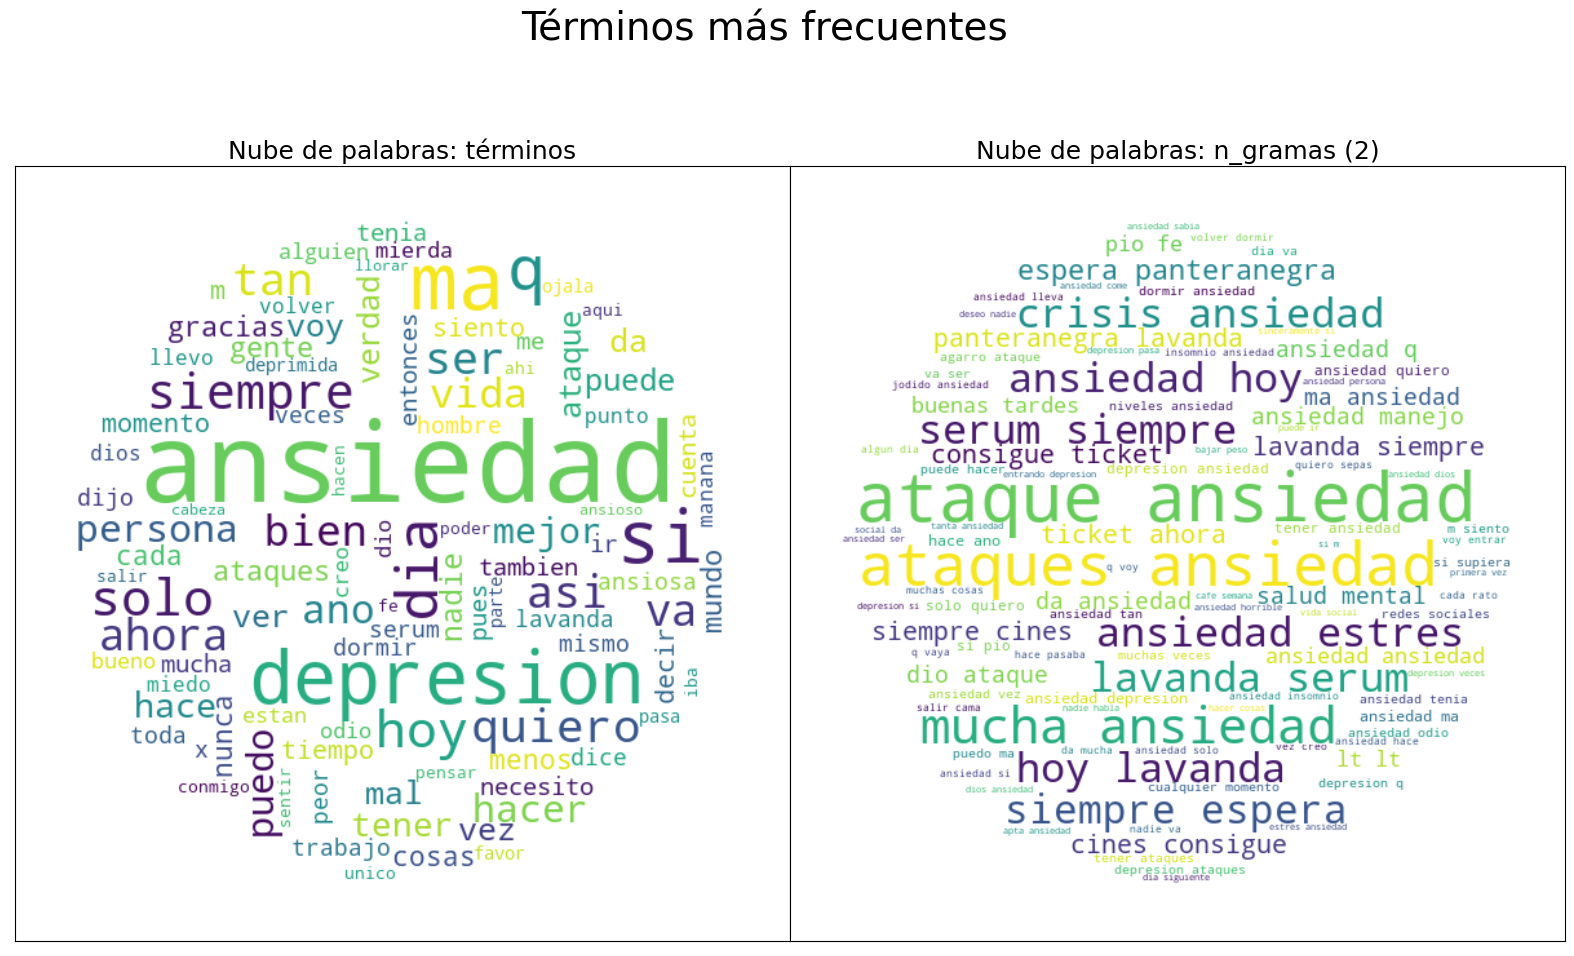

In [527]:
# Si se utiliza el parámetro "ubicacion_archivo", la imagen generada se guardará en la ubicación especificada
par_nubes(tweets_unidos, n1=1, n2=2, ubicacion_archivo='salida/nube_uni_bi.jpg')

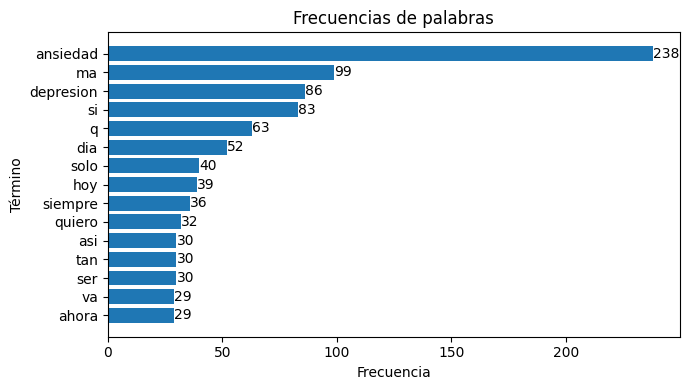

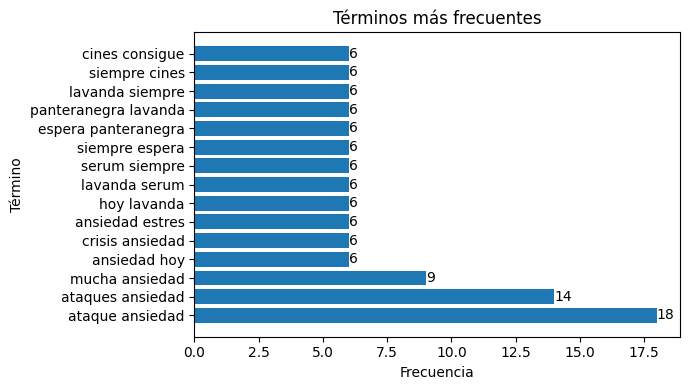

In [528]:
from contexto.exploracion import grafica_barchart_frecuencias

# Gráficas de barras con las frecuencias
grafica_barchart_frecuencias(tweets_unidos, ubicacion_archivo='salida/barras_palabras.jpg', 
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

# Si se cambia el parámetro "ascendente" a False, los términos más frecuentes saldrán en la parte de abajo
grafica_barchart_frecuencias(tweets_unidos, ubicacion_archivo='salida/barras_bigramas.jpg', 
                             n_grama=2, ascendente=False, dim_figura=(7,4))

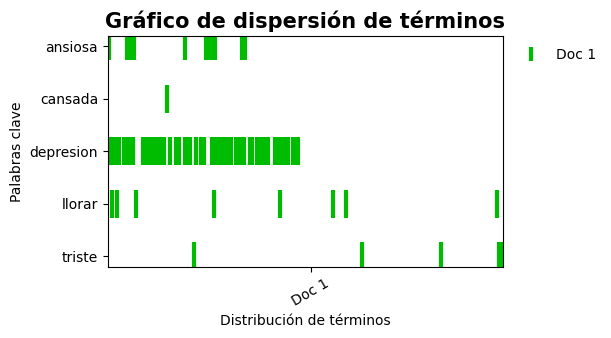

In [529]:
from contexto.exploracion import graficar_dispersion

# Se definen las palabras de interés
mis_palabras = ['triste', 'llorar', 'depresion', 'cansada', 'ansiosa']

# Gráfico de dispersión
graficar_dispersion(tweets_unidos, mis_palabras, dim_figura=(6,3))

Hay que meterle ruido (datos de gente alegre, etc).
Para diferenciar gente.

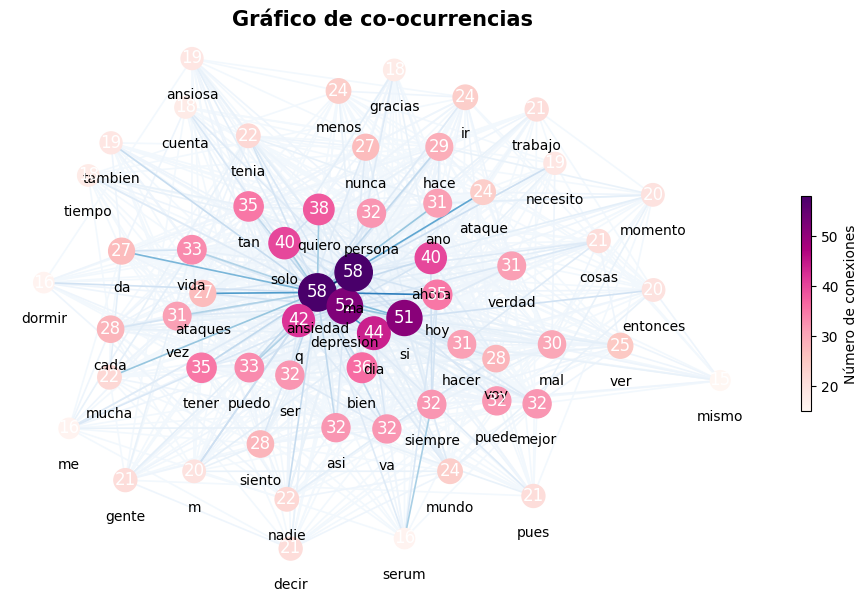

<AxesSubplot:title={'center':'Gráfico de co-ocurrencias'}>

<Figure size 640x480 with 0 Axes>

In [530]:
## Obtener matrices de coocurrencias
from contexto.exploracion import matriz_coocurrencias
from contexto.exploracion import graficar_coocurrencias

# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(tweets_unidos, max_num=60, modo='ventana', ventana=5)

## Graficar co-ocurrencias de palabras en el texto
graficar_coocurrencias(mat_ven, ubicacion_archivo='salida/grafo_doc_full.jpg', dim_figura=(12,7), graficar=True, seed = 31,
                      offset_y =0.13, vmin= 20)

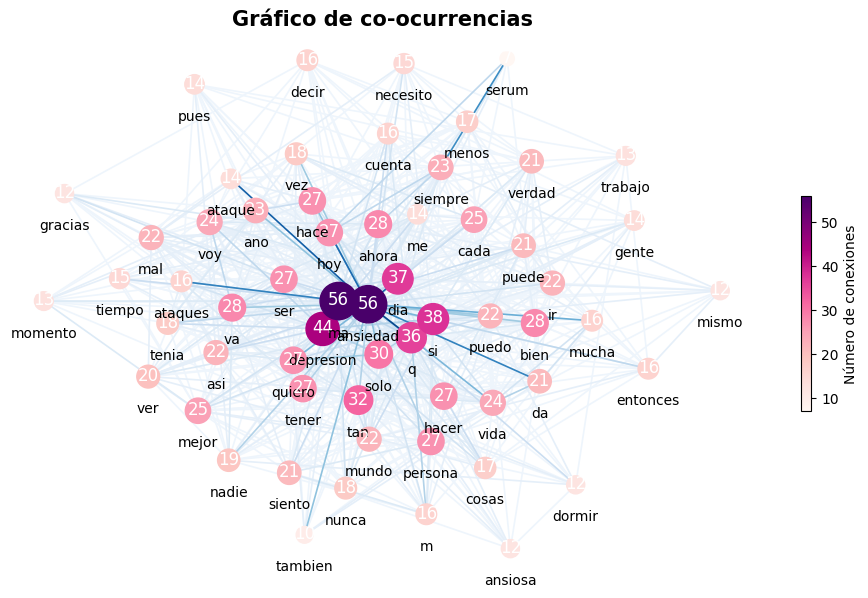

<AxesSubplot:title={'center':'Gráfico de co-ocurrencias'}>

<Figure size 640x480 with 0 Axes>

In [531]:
## Obtener matrices de coocurrencias
from contexto.exploracion import matriz_coocurrencias
from contexto.exploracion import graficar_coocurrencias

# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(tweets, max_num=60, modo='ventana', ventana=5)

## Graficar co-ocurrencias de palabras en el texto
graficar_coocurrencias(mat_ven, ubicacion_archivo='salida/grafo_doc_full.jpg', dim_figura=(12,7), graficar=True, seed = 31,
                      offset_y =0.13, vmin= 20)

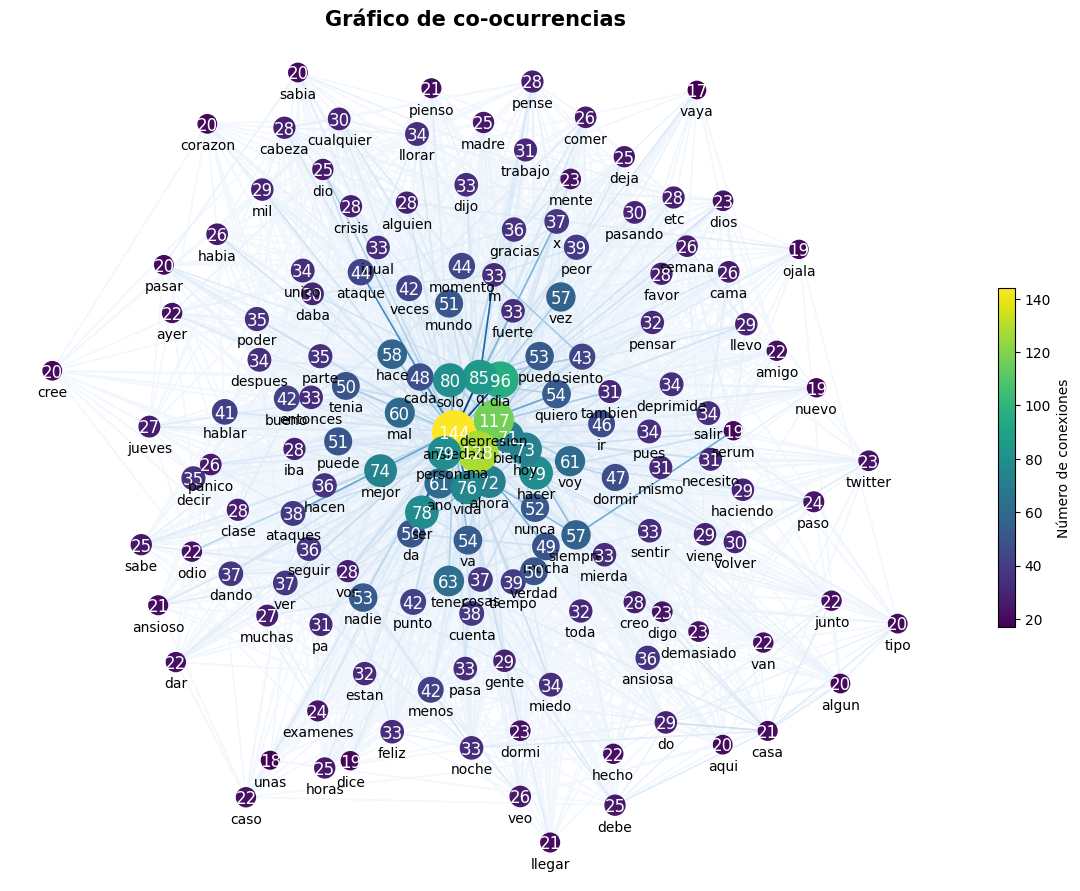

<AxesSubplot:title={'center':'Gráfico de co-ocurrencias'}>

In [532]:
from contexto.limpieza import limpieza_texto, lista_stopwords
from contexto.exploracion import matriz_coocurrencias
from contexto.exploracion import graficar_coocurrencias

# Diferentes textos en una lista
textos = tweets

# limpieza básica de texto para  quitar puntuaciones
textos = [limpieza_texto(t, lista_palabras=lista_stopwords()) for t in textos]

mat_doc = matriz_coocurrencias(textos)

graficar_coocurrencias(mat_doc, n_nodos = 0.75, vmin= 50, escala = 900,dim_figura=(15,11), 
                       node_cmap = "viridis", offset_y = 0.06, seed = 1)